In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 49.6MB/s]


In [11]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation = 'relu'))
model.add(Dense(total_words, activation = 'softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy']) 
### END CODE HERE
    
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 64)            205504    
                                                                 
 bidirectional_5 (Bidirectio  (None, 10, 64)           24832     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 10, 64)            0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3211)              208715    
                                                                 
 dense_1 (Dense)             (None, 3211)             

In [12]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 65s 120ms/step - loss: 6.8492 - accuracy: 0.0212
Epoch 2/100
484/484 [==============================] - 72s 149ms/step - loss: 6.4592 - accuracy: 0.0285
Epoch 3/100
484/484 [==============================] - 73s 151ms/step - loss: 6.2633 - accuracy: 0.0362
Epoch 4/100
484/484 [==============================] - 72s 149ms/step - loss: 6.0596 - accuracy: 0.0404
Epoch 5/100
484/484 [==============================] - 72s 150ms/step - loss: 5.8113 - accuracy: 0.0523
Epoch 6/100
484/484 [==============================] - 72s 150ms/step - loss: 5.5345 - accuracy: 0.0629
Epoch 7/100
484/484 [==============================] - 72s 149ms/step - loss: 5.2523 - accuracy: 0.0786
Epoch 8/100
484/484 [==============================] - 72s 149ms/step - loss: 4.9387 - accuracy: 0.0907
Epoch 9/100
484/484 [==============================] - 72s 149ms/step - loss: 4.6267 - accuracy: 0.1080
Epoch 10/100
484/484 [==============================] - 72s 148m

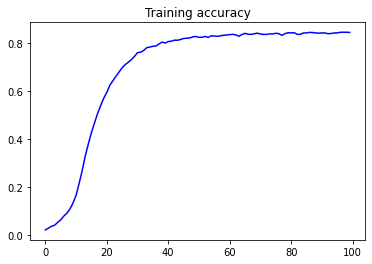

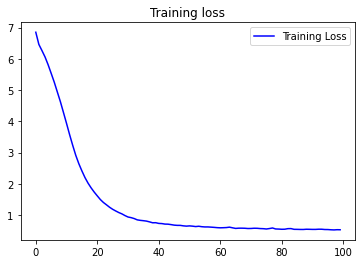

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model.predict(token_list),axis=1)

	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope by authority ill new ' more bright in trust heaven's contents deceive warm'd warm'd ' hang in allay'd light light light light light allay'd light both twain allay'd die as art as night as night grow light light light light mother ' more eyed torn die in lease to thee so i near strong friend ' so so near slain slain near chest hate hid razed cover away away away away away more more hits torn ' not torn rotten now now my name mad eyed ' worth her glory in me love thee more nearly nearly you away still
